Checking the coordinates for the scenario at Active Pass and whether they're designated as water on the Salish Sea Cast grid.

In [237]:
import xarray as xr
import numpy as np
from cmocean import cm
import geopandas as gpd
import matplotlib.pyplot as plt
import netCDF4 as nc

%matplotlib inline

In [238]:
grid = nc.Dataset('/ocean/rlovindeer/Atlantis/Physics/Grids/ubcSSn2DMeshMaskV17-02.nc')

lats = grid['gphit'][0,:]
lons = grid['glamt'][0,:]
tmask = grid['tmaskutil'][0,:] # water = 1, land = 0

#checking location of the point at active pass
print(np.where(lats == 48.86029))
print(np.where(lons == -123.3))

(array([396]), array([229]))
(array([15]), array([33]))


In [161]:
#locating the points at active pass
tmask[np.where(lats == 48.86029),np.where(lons == -123.3)]

masked_array(
  data=[[1],
        [0]],
  mask=False,
  fill_value=999999,
  dtype=int8)

In [244]:
#unsure of GridY and GridX and swapping points to confirm
#tmask[np.where(lons == -123.3),np.where(lats == 48.86029)]

tmask[np.where(lats == 48.843),np.where(lons == -123.343)]

masked_array(
  data=[],
  mask=False,
  fill_value=999999,
  dtype=int8)

In [162]:
#extracting and plotting the grid data
pfile = xr.open_dataset(str('/ocean/rlovindeer/Atlantis/Physics/Grids/ubcSSn2DMeshMaskV17-02.nc'), decode_cf=True)

mask = np.ma.filled(pfile.variables['tmaskutil'])
lat = np.ma.filled(pfile.variables['gphit']) 
lon = np.ma.filled(pfile.variables['glamt']) 

In [242]:
file = xr.open_dataset(str('/ocean/rlovindeer/Atlantis/Physics/Grids/ubcSSnBathymetryV17-02_a29d_efc9_4047.nc'), decode_cf=True)
file

<xarray.Dataset>
Dimensions:     (gridY: 898, gridX: 398)
Coordinates:
  * gridY       (gridY) int32 0 1 2 3 4 5 6 7 ... 891 892 893 894 895 896 897
  * gridX       (gridX) int16 0 1 2 3 4 5 6 7 ... 391 392 393 394 395 396 397
Data variables:
    bathymetry  (gridY, gridX) float64 ...
    latitude    (gridY, gridX) float64 ...
    longitude   (gridY, gridX) float64 ...
Attributes: (12/21)
    acknowledgement:           MEOPAR, ONC, Compute Canada, CHS, NOAA, USGS\n...
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             sallen@eoas.ubc.ca
    creator_name:              Salish Sea MEOPAR Project Contributors
    creator_url:               https://salishsea-meopar-docs.readthedocs.io/
    ...                        ...
    references:                https://bitbucket.org/salishsea/nemo-forcing/r...
    source:                    https://bitbucket.org/salishsea/tools/src/tip/...
    sourceUrl:                 (local files)
    standard_name_vocabulary:  CF Standard Name Table v29
    summary:                   Salish Sea NEMO Model Grid, Geo-location and B...
    title:                     Salish Sea NEMO Model Grid, Geo-location and B...

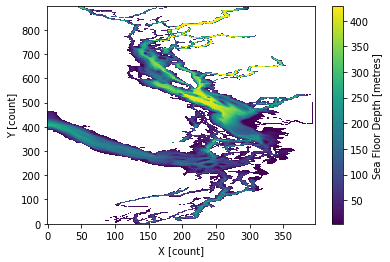

In [247]:
file.bathymetry.plot()

In [163]:
pfile

<xarray.Dataset>
Dimensions:    (time: 1, gridY: 898, gridX: 398)
Coordinates:
  * time       (time) datetime64[ns] 2014-09-12T00:30:00
  * gridY      (gridY) int16 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX      (gridX) int16 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
Data variables:
    tmaskutil  (time, gridY, gridX) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    glamt      (time, gridY, gridX) float32 -123.4 -123.4 ... -124.3 -124.3
    gphit      (time, gridY, gridX) float32 46.86 46.86 46.86 ... 51.1 51.1 51.1
    e1t        (time, gridY, gridX) float64 ...
    e2t        (time, gridY, gridX) float64 ...
    mbathy     (time, gridY, gridX) int16 ...
Attributes: (12/34)
    acknowledgement:           MEOPAR, ONC, Compute Canada
    cdm_data_type:             Grid
    Conventions:               CF-1.6, COARDS, ACDD-1.3
    creator_email:             sallen@eoas.ubc.ca
    creator_name:              Salish Sea MEOPAR Project Contributors
    creator_url:               https://salishsea.eos.ubc.ca/erddap/info/\nhtt...
    ...                        ...
    standard_name_vocabulary:  CF Standard Name Table v29
    summary:                   Salish Sea NEMO Model Grid, 2D Mesh Mask, v17-...
    time_coverage_end:         2014-09-12T00:30:00Z
    time_coverage_start:       2014-09-12T00:30:00Z
    TimeStamp:                 14/03/2019 15:00:00 -0700
    title:                     Salish Sea NEMO Model Grid, 2D Mesh Mask, v17-02

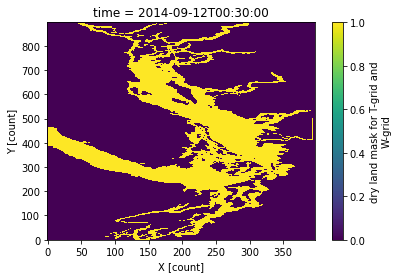

In [174]:
ax = pfile.tmaskutil.plot()

In [234]:
#locating coordinates with water at active pass
coordinates = 384,254 #upper bound
print(lats[coordinates], lons[coordinates])
if tmask[coordinates] == 1:
    print('water')
else:
    print('land')

48.86058 -123.357254
water


In [233]:
#locating coordinates with water at active pass
coordinates = 385,254 #upper bound
print(lats[coordinates], lons[coordinates])
if tmask[coordinates] == 1:
    print('water')
else:
    print('land')

48.86452 -123.3606
land


In [227]:
#locating coordinates with water at active pass
coordinates = 374,254 #lower bound
print(lats[coordinates], lons[coordinates])
if tmask[coordinates] == 1:
    print('water')
else:
    print('land')

48.821167 -123.32378
water


In [235]:
#locating coordinates with water at active pass
coordinates = 373,254 #lower bound
print(lats[coordinates], lons[coordinates])
if tmask[coordinates] == 1:
    print('water')
else:
    print('land')

48.817223 -123.32043
land


In [269]:
# checking OP out-of-bounds coordinates against the grid

print(np.where(lats == 48.843))
print(np.where(lons == -123.343064))

(array([367]), array([280]))
(array([358, 417]), array([240, 278]))


In [275]:
# checking if coordinates are land or water

coordinates = 367,278 #from above
print(lats[coordinates], lons[coordinates])
if tmask[coordinates] == 1:
    print('water')
else:
    print('land')

48.8392 -123.17547
water
